# Exploratory Data Analysis
First load some necessary modules and set the system path.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
os.chdir('/san-data/usecase/magnet_g/misc/PCA_DATA_VIS/Yiming/Summer 2017') 

List the files present in the "Summer 2017" folder.

In [4]:
from subprocess import check_output
print(check_output(["ls", "../Summer 2017"]).decode("utf8"))

Accuracy
final_task.R
iREADY
plot_functions.R
properties_2016.csv
traffic_speed_metrics.R
train_2016_v2.csv
unsupervised.R



## train_2016_v2 Exploration

In [9]:
train_df = pd.read_csv("train_2016_v2.csv", parse_dates = ["transactiondate"])
train_df.shape

(90275, 3)

In [11]:
train_df.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


### logerror

The target variable is **logerror**. Let's see how this varialbe is distributed.

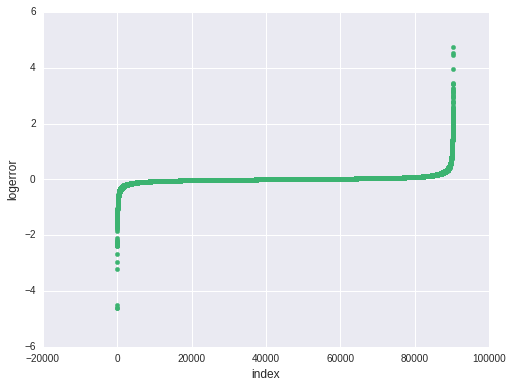

In [14]:
plt.figure(figsize = (8, 6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror.values), color = "mediumseagreen")
plt.xlabel('index', fontsize = 12)
plt.ylabel('logerror', fontsize = 12)
plt.show()

There are some outliers on both sides. So let's move some outliers out and create a histogram plot.

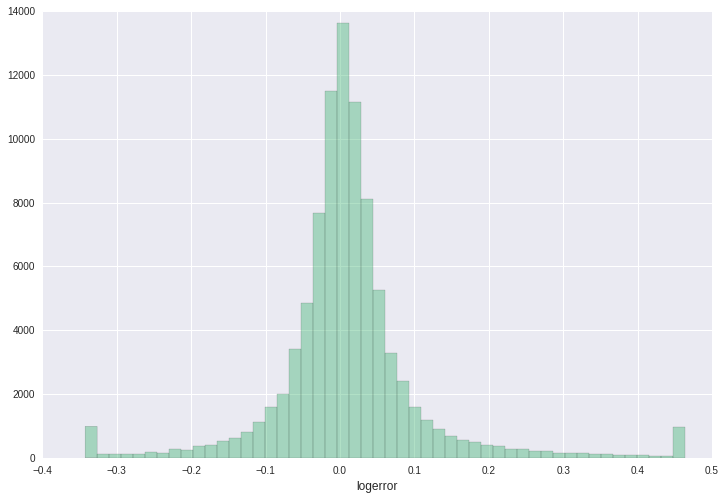

In [15]:
# upper and lower limits
ulimit = np.percentile(train_df.logerror.values, 99) # 99 percentile
llimit = np.percentile(train_df.logerror.values, 1)# 1 percentile
train_df['logerror'].ix[train_df['logerror'] > ulimit] = ulimit
train_df['logerror'].ix[train_df['logerror'] < llimit] = llimit

plt.figure(figsize = (12, 8))
sns.distplot(train_df.logerror.values, bins = 50, kde = False, color = "mediumseagreen")
plt.xlabel('logerror', fontsize = 12)
plt.show()

Now it looks like a perfect normal distribution for **logerror**.

### Transaction Date (transactiondate)
Now go to the date field. First find out the number of transactions in each month.

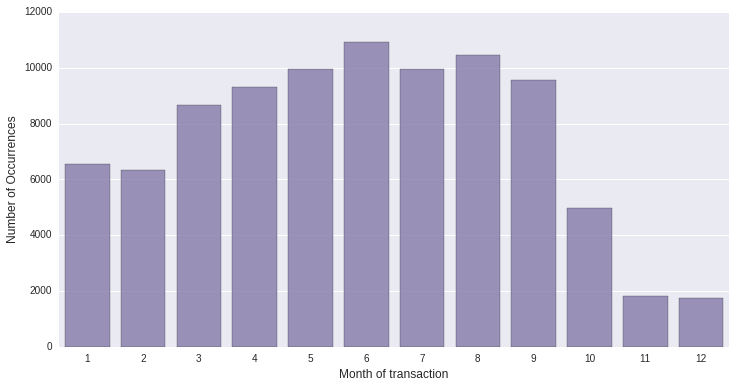

In [23]:
# Convert pandas series to DateTime in a dataframe, here extract month (year / day / ...)
train_df['transaction_month'] = train_df['transactiondate'].dt.month

cnt_srs = train_df['transaction_month'].value_counts()

# Visualization
plt.figure(figsize = (12, 6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha = 0.8, color = color[3])
plt.xlabel('Month of transaction', fontsize = 12)
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.show()

As we could see,the train data has all the transactions before October 15, 2016, plus some of the transactions after October 15, 2016.

So we have shorter bars in the last three months.

### Parcel ID (parcelid)

In [24]:
(train_df['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

So most of the parcel ids are appearing only once in the dataset.

## properties_2016 Exploration

In [27]:
prop_df = pd.read_csv("properties_2016.csv")
prop_df.shape

/opt/anaconda/4.1.1/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)

In [28]:
prop_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


### Missing Values

There are many missing values in the dataset. So we'll first explore those values.

In [35]:
# missing_df is a dataframe, which contains variables with missing values as well as the counts of NAs
missing_df = prop_df.isnull().sum(axis = 0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count'] > 0]
missing_df = missing_df.sort_values(by = 'missing_count')

missing_df.tail()

,column_name,missing_count
2,architecturalstyletypeid,2979156
49,fireplaceflag,2980054
46,yardbuildingsqft26,2982570
3,basementsqft,2983589
41,storytypeid,2983593


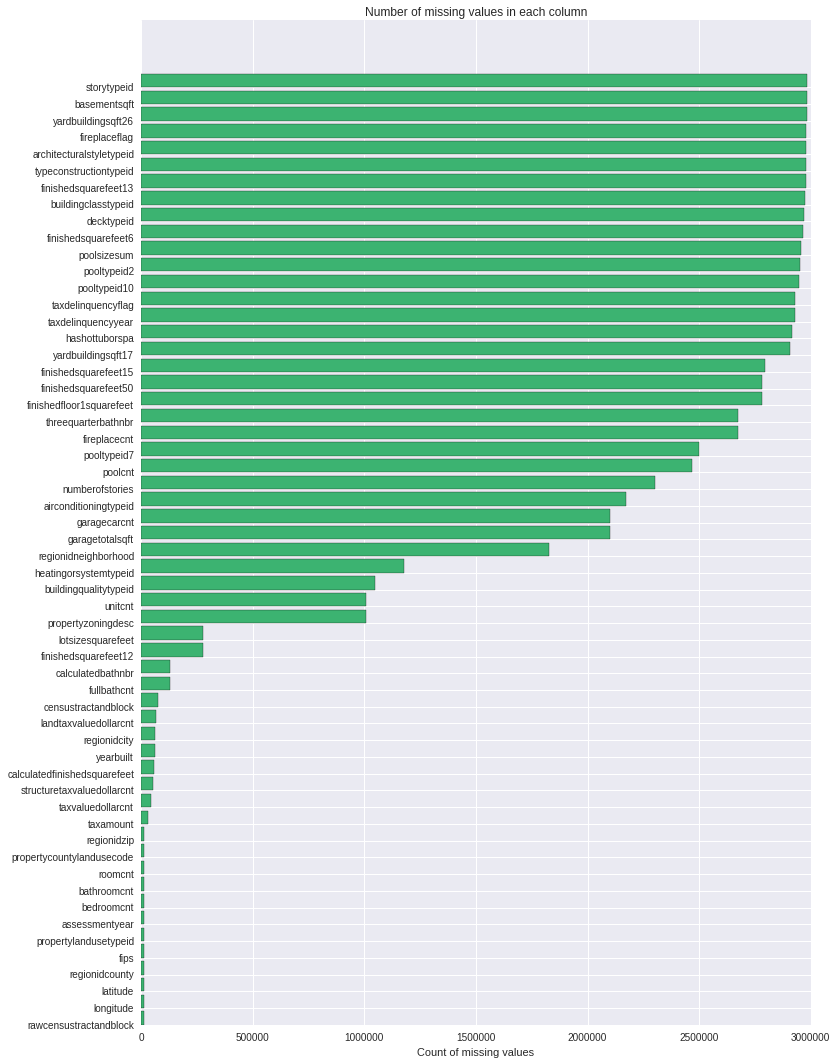

In [36]:
# Visualization
ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize = (12, 18))
rects = ax.barh(ind, missing_df.missing_count.values, color = 'mediumseagreen')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation = 'horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

### Latitude & longitude

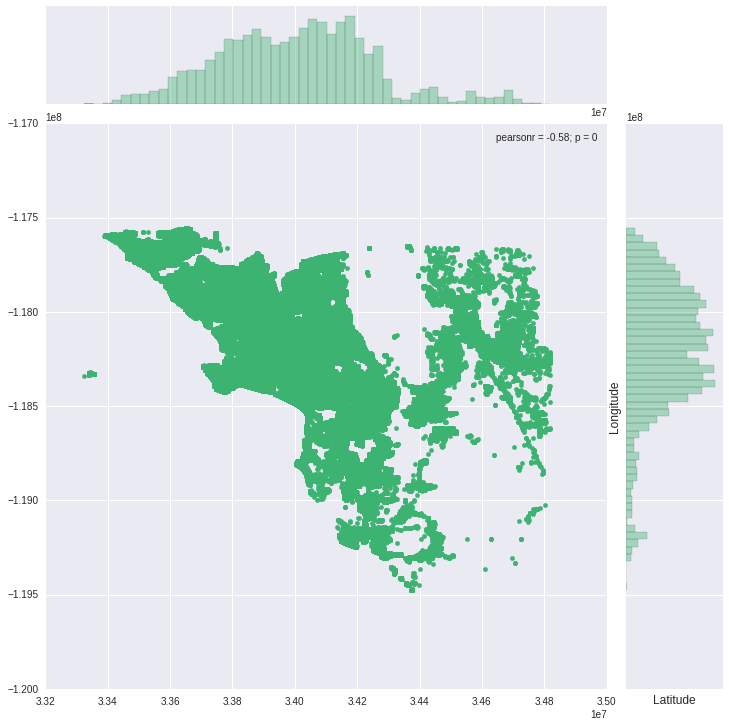

In [38]:
plt.figure(figsize = (12, 12))

# Put two variables on one plot
sns.jointplot(x = prop_df.latitude.values, y = prop_df.longitude.values, size = 10, color = "mediumseagreen")
plt.ylabel('Longitude', fontsize = 12)
plt.xlabel('Latitude', fontsize = 12)
plt.show()

We are provided with a full list of real estate properties in three counties (Los Angeles, Orange and Ventura, California) data in 2016.

## Merge train and properties file